# PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow import keras

In [2]:
FF=pd.read_csv("forestfires.csv")
FF

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
FF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
FF.shape

(517, 31)

In [5]:
FF.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [6]:
# as dummy variables are already given for month and day in data set, lets drop month and day
FF=FF.drop(["month","day"],axis=1)
FF.head()
X=FF.drop("size_category",axis=1)

In [7]:
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
y= pd.DataFrame({"size_category":FF.iloc[:,-1]})
y

,size_category
0,small
1,small
2,small
3,small
4,small
...,...
512,large
513,large
514,large
515,small


In [10]:
# lets check for proportion of values for small and large catagory
y.value_counts()/len(y)

size_category
small            0.731141
large            0.268859
dtype: float64

it can be seen that small catagory is almost 73 % and large is 26 %, so handling this imbalance by resampling

In [11]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [12]:
x_resampled,y_resampled=RandomOverSampler().fit_resample(X,y)

In [13]:
print(x_resampled.shape)

(756, 28)


In [14]:
print(y_resampled.shape)

(756, 1)


In [15]:
y_resampled["size_category"]=y_resampled["size_category"].map({"small":0,"large":1})

In [16]:
# Using Test train slpit and pplying Standard scalar on the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
X_train,X_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.3,random_state=42)

In [18]:
scaled=StandardScaler()
X_train=scaled.fit_transform(X_train)
X_test=scaled.transform(X_test)

In [19]:
#Initialising ANN
classifier=Sequential()

# Adding the input layer and first hidden layer 
classifier.add(Dense(units=10, kernel_initializer= "he_uniform", activation= "relu", input_dim=28 ))
classifier.add(Dropout(0.2))

# Adding second hidden layer
classifier.add(Dense(units=15, kernel_initializer= "he_uniform", activation= "relu"))
classifier.add(Dropout(0.3))

classifier.add(Dense(units=10, kernel_initializer= "he_uniform", activation= "relu"))
classifier.add(Dropout(0.2))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer= "glorot_uniform", activation= "sigmoid"))


# Compling the ANN
classifier.compile(optimizer= "adam", loss="binary_crossentropy", metrics= ["accuracy"])


In [20]:
# Fitting the ANN on training data set
model_history=classifier.fit(X_train,y_train,validation_split=0.3,batch_size=10,epochs=100)

Epoch 1/100
37/37 [==============================] - 1s 6ms/step - loss: 1.1209 - accuracy: 0.4703 - val_loss: 0.7559 - val_accuracy: 0.5472
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 0.9514 - accuracy: 0.4703 - val_loss: 0.6932 - val_accuracy: 0.5283
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 0.8438 - accuracy: 0.5270 - val_loss: 0.6842 - val_accuracy: 0.5849
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 0.7623 - accuracy: 0.5595 - val_loss: 0.6826 - val_accuracy: 0.5409
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 0.8059 - accuracy: 0.5108 - val_loss: 0.6809 - val_accuracy: 0.5535
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 0.7728 - accuracy: 0.5541 - val_loss: 0.6823 - val_accuracy: 0.5346
Epoch 7/100
37/37 [==============================] - 0s 2ms/step - loss: 0.7442 - accuracy: 0.5730 - val_loss: 0.6828 - val_accuracy: 0.5472
Epoch 8/100
3

In [21]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


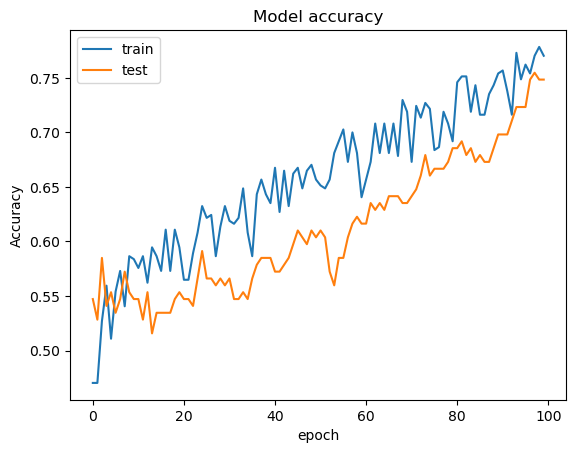

In [22]:
# summary of History for accuracy
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"],loc="upper left")
plt.show()

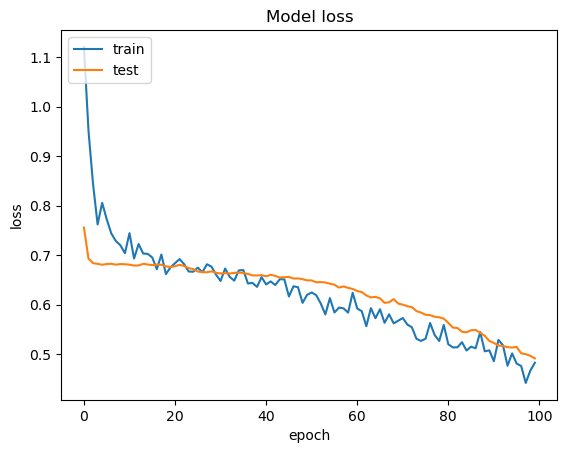

In [23]:
# summary of History for loss
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"],loc="upper left")
plt.show()

In [24]:
# Predicting the test 
y_pred=classifier.predict(X_test)
y_pred=(y_pred >= 0.5)

8/8 [==============================] - 0s 2ms/step


In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [26]:
confusion_matrix(y_test,y_pred)

array([[78, 43],
       [20, 86]], dtype=int64)

In [27]:
accuracy_score(y_test,y_pred)

0.7224669603524229

In [29]:
pip install keras-tuner --upgrade

     -------------------------------------- 176.1/176.1 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [30]:
#Optimizing the parameters using keras tuner

from keras_tuner import RandomSearch
from tensorflow.keras import layers

In [31]:
def build_model(hp):
    model=keras.Sequential()
    model.add(layers.Flatten())
    for i in range(hp.Int("num_layers", 2, 20)):
        model.add(
            layers.Dense(
                units=hp.Int("units_" + str(i), min_value=32, max_value=512, step=32),
                activation="relu",
            )
        )
    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", [1e-2, 1e-3, 1e-4])),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [32]:
tuner=RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)

In [33]:
tuner.search(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Trial 3 Complete [00h 00m 30s]
val_accuracy: 0.8788546323776245

Best val_accuracy So Far: 0.9295154213905334
Total elapsed time: 00h 01m 12s
INFO:tensorflow:Oracle triggered exit


In [34]:
classifier1=Sequential()
classifier1.add(Dense(160,input_dim=28, activation='relu'))
classifier1.add(Dense(32,activation='relu'))
classifier1.add(Dense(1,activation='sigmoid'))

In [35]:
# Compling the ANN
optimizer=keras.optimizers.Adam(learning_rate=0.001)
classifier1.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["accuracy"])

In [36]:
modela_history1=classifier1.fit(X_train,y_train,validation_split=0.3,batch_size=10,epochs=150)

Epoch 1/150
37/37 [==============================] - 1s 4ms/step - loss: 0.6887 - accuracy: 0.5459 - val_loss: 0.6423 - val_accuracy: 0.6352
Epoch 2/150
37/37 [==============================] - 0s 2ms/step - loss: 0.5986 - accuracy: 0.6973 - val_loss: 0.6101 - val_accuracy: 0.6289
Epoch 3/150
37/37 [==============================] - 0s 2ms/step - loss: 0.5427 - accuracy: 0.7486 - val_loss: 0.5950 - val_accuracy: 0.6667
Epoch 4/150
37/37 [==============================] - 0s 2ms/step - loss: 0.4894 - accuracy: 0.7973 - val_loss: 0.5825 - val_accuracy: 0.7170
Epoch 5/150
37/37 [==============================] - 0s 2ms/step - loss: 0.4368 - accuracy: 0.8351 - val_loss: 0.5516 - val_accuracy: 0.6918
Epoch 6/150
37/37 [==============================] - 0s 2ms/step - loss: 0.3853 - accuracy: 0.8892 - val_loss: 0.5063 - val_accuracy: 0.7547
Epoch 7/150
37/37 [==============================] - 0s 1ms/step - loss: 0.3420 - accuracy: 0.8811 - val_loss: 0.4974 - val_accuracy: 0.7547
Epoch 8/150
3

In [37]:
# Predicting the test 
y_pred1=classifier1.predict(X_test)
y_pred1=(y_pred1>=0.5)

8/8 [==============================] - 0s 1ms/step


In [38]:
accuracy_score(y_test,y_pred1)

0.9118942731277533

In [39]:
y_pred2=classifier1.predict(X_train)
y_pred2=(y_pred2 >= 0.5)

17/17 [==============================] - 0s 955us/step


In [40]:
accuracy_score(y_train,y_pred2)

0.9735349716446124